## Лабораторная работа 4.5.2

In [131]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.optimize as sp
import tikzplotlib as tikz

In [132]:
def csvtotex(input, output, columns=None, rows=[-1], type=None):
    df = pd.read_csv(input, sep=",", usecols=columns, quotechar='"', dtype=type)
    df = df[df.index.isin(rows)]
    pd.DataFrame.to_csv(df, output, sep="&", index=False)
    with open(output, "r") as data:
        content = data.readlines()
    with open(output, "w") as data:
        data.write("\\begin{tabular}{")
        for c in columns: data.write("|l")
        data.write("|}")
        data.write("\hline")
        for str in content:
            data.write(str)
            data.write("\\\\")
            data.write("\hline")
        data.write("\end{tabular}")
    return df

In [133]:
def print_err(a, a_err):
    print(np.round(a, decimals = 1 + round(abs(np.log10(a_err)))),
    '\pm', np.round(a_err, decimals = 1 + round(abs(np.log10(a_err)))))

In [134]:
def T(n, x):
    return np.cos(n * np.arccos(x))

>### Зависимость видимости от угла поляроида

In [135]:
df = csvtotex("../data/data.csv", "../data/table1.tex", [0, 2, 3, 4, 5, 6, 7, 8, 9], range(13))
display(df)

,"$\beta$, $^{\circ}$","$h_1$, дел","$h_2$, дел","$h_3$, дел","$h_4$, дел",$\delta$,$\upsilon_1$,$\upsilon$,$\upsilon_3$
0,165.0,1.0,1.0,0.8,1.0,1.0,1.0,0.1,0.1
1,155.0,1.0,1.0,0.6,1.2,1.0,1.0,0.3,0.3
2,145.0,1.0,1.0,0.4,1.6,1.0,1.0,0.6,0.6
3,135.0,1.0,1.0,0.2,1.8,1.0,1.0,0.8,0.8
4,125.0,1.0,1.0,0.0,2.0,1.0,1.0,1.0,1.0
5,115.0,3.0,3.0,1.8,4.2,1.0,1.0,0.4,0.4
6,105.0,3.0,3.0,1.8,4.2,1.0,1.0,0.4,0.4
7,95.0,3.0,3.0,2.0,4.2,1.0,1.0,0.4,0.4
8,85.0,3.0,3.0,2.0,4.2,1.0,1.0,0.4,0.4
9,65.0,3.0,3.0,2.4,3.6,1.0,1.0,0.2,0.2


In [136]:
b = np.array(df[df.columns.tolist()[0]].values)
sig_b = np.full_like(b, 1)
h1 = np.array(df[df.columns.tolist()[1]].values)
h2 = np.array(df[df.columns.tolist()[2]].values)
h3 = np.array(df[df.columns.tolist()[3]].values)
h4 = np.array(df[df.columns.tolist()[4]].values)
for i, h in enumerate(h1):
    if h == 3.0:
        h1[i] -= 2
        h2[i] -= 2
        h4[i] -= 2
        h3[i] -= 2
for i, h in enumerate(h3):
    if h < 0.0:
        h3[i] = 0.0
sig_h = np.full_like(b, 0.2) 
delta = h1 / h2
sig_delta = delta * ((sig_h / h1) ** 2 + (sig_h / h2) ** 2) ** 0.5
v1 = 2 * delta ** 0.5 / (1 + delta)
sig_v1 = np.abs((1 - delta) / (delta ** 0.5 * (1 + delta) ** 2)) * sig_delta
v = (h4 - h3) / (h3 + h4)
sig_v = ((((2 * h4) / (h3 + h4) ** 2) * sig_h) ** 2 + ((-(2 * h4) / (h3 + h4) ** 2) * sig_h) ** 2) ** 0.5
v3 = v / v1
sig_v3 = v3 * ((sig_v / v) ** 2 + (sig_v1 / v1) ** 2) ** 0.5

Косинус

In [137]:
def fit1(x, p0):
    return np.cos((x - p0) / 180 * np.pi)

In [138]:
k1, err1 = sp.curve_fit(fit1, b, v3)
print_err(k1[0], err1[0][0])

95.61 \pm 12.73


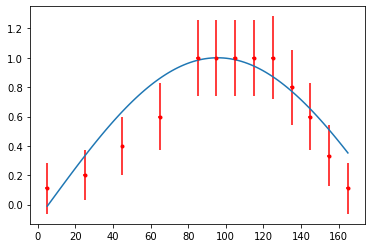

In [139]:
plt.errorbar(b, v3, xerr=sig_b, yerr=sig_v3, fmt='.', color='red')
x = np.linspace(b.min(), b.max(), 100)
plt.plot(x, fit1(x, k1[0]))
#tikz.save("plot1.tex")

Квадрат косинуса

In [140]:
def fit2(x, p0):
    return np.cos((x - p0) / 180 * np.pi) ** 2

In [141]:
k2, err2 = sp.curve_fit(fit2, b, v3)
print_err(k2[0], err2[0][0])

-77.75 \pm 4.22


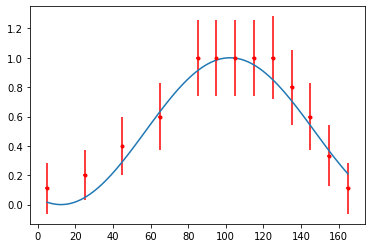

In [142]:
plt.errorbar(b, v3, xerr=sig_b, yerr=sig_v3, fmt='.', color='red')
x = np.linspace(b.min(), b.max(), 100)
plt.plot(x, fit2(x, k2[0]))
#tikz.save("plot2.tex")

>### Зависимость видимости от разности хода лучей

In [143]:
df = csvtotex("../data/data.csv", "../data/table2.tex", np.array(range(10)) + 12, range(27), type=float)
display(df)

,"$h_1 $, дел","$h_2 $, дел","$h_3 $, дел","$h_4 $, дел","$x$, см","$l$, см",$\upsilon $,$\delta $,$\upsilon_1 $,$\upsilon_2$
0,3.0,3.0,2.4,3.8,14.0,-4.0,0.2,1.0,1.0,0.2
1,3.0,3.0,1.2,4.8,16.0,0.0,0.6,1.0,1.0,0.6
2,3.0,3.0,2.6,3.4,17.0,2.0,0.1,1.0,1.0,0.1
3,3.0,3.0,2.2,3.4,18.0,4.0,0.2,1.0,1.0,0.2
4,3.0,3.0,2.4,3.6,19.0,6.0,0.2,1.0,1.0,0.2
5,3.0,3.0,2.6,3.6,20.0,8.0,0.2,1.0,1.0,0.2
6,3.0,3.0,2.4,3.8,21.0,10.0,0.2,1.0,1.0,0.2
7,3.0,3.0,2.4,3.8,22.0,12.0,0.2,1.0,1.0,0.2
8,3.0,3.0,2.6,3.6,24.0,16.0,0.2,1.0,1.0,0.2
9,3.0,3.0,2.8,3.4,30.0,28.0,0.1,1.0,1.0,0.1


In [144]:
h1 = np.array(df[df.columns.tolist()[0]].values)
h2 = np.array(df[df.columns.tolist()[1]].values)
h3 = np.array(df[df.columns.tolist()[2]].values)
h4 = np.array(df[df.columns.tolist()[3]].values)
sig_h = np.full_like(h, 0.2)
X0 = 16
X = np.array(df[df.columns.tolist()[4]].values)
sig_X = np.full_like(X, 1)
l = 2 * (X - X0)
sig_l = 2 * sig_X
delta = h1 / h2
sig_delta = delta * ((sig_h / h1) ** 2 + (sig_h / h2) ** 2) ** 0.5
v1 = 2 * delta ** 0.5 / (1 + delta)
sig_v1 = np.abs((1 - delta) / (delta ** 0.5 * (1 + delta) ** 2)) * sig_delta
v = (h4 - h3) / (h3 + h4)
sig_v = ((((2 * h4) / (h3 + h4) ** 2) * sig_h) ** 2 + ((-(2 * h4) / (h3 + h4) ** 2) * sig_h) ** 2) ** 0.5
v2 = v / v1
sig_v2 = v2 * ((sig_v / v) ** 2 + (sig_v1 / v1) ** 2) ** 0.5


In [145]:
def fit3(x, p0, p1, p2, p3, p4, p5, p6):
    k = 2 / (l[l.size - 1] - l[0])
    y = k * (x - (l[l.size - 1] + l[0]) / 2)
    return p0 * T(0, y) + p1 * T(1, y) + p2 * T(2, y) + p3 * T(3, y) + p4 * T(4, y) + p5 * T(5, y) + p6 * T(6, y)

In [146]:
k, err = sp.curve_fit(fit3, l, v2)
print_err(k2[0], err2[0][0])

-77.75 \pm 4.22


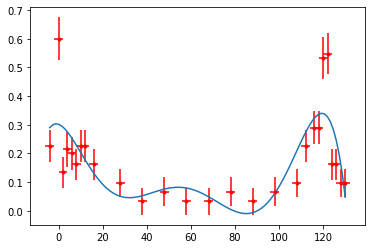

In [147]:
plt.errorbar(l, v2, xerr=sig_l, yerr=sig_v2, fmt='.', color='red')
x = np.linspace(l.min(), l.max(), 100)
plt.plot(x, fit3(x, k[0], k[1], k[2], k[3], k[4], k[5], k[6]))
#tikz.save("plot3.tex")

Чистка данных

In [148]:
df = df[df.index.isin([0, 1, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 21, 22, 24, 26])]

In [149]:
h1 = np.array(df[df.columns.tolist()[0]].values)
h2 = np.array(df[df.columns.tolist()[1]].values)
h3 = np.array(df[df.columns.tolist()[2]].values)
h4 = np.array(df[df.columns.tolist()[3]].values)
sig_h = np.full_like(h, 0.2)
X0 = 16
X = np.array(df[df.columns.tolist()[4]].values)
sig_X = np.full_like(X, 1)
l = 2 * (X - X0)
sig_l = 2 * sig_X
delta = h1 / h2
sig_delta = delta * ((sig_h / h1) ** 2 + (sig_h / h2) ** 2) ** 0.5
v1 = 2 * delta ** 0.5 / (1 + delta)
sig_v1 = np.abs((1 - delta) / (delta ** 0.5 * (1 + delta) ** 2)) * sig_delta
v = (h4 - h3) / (h3 + h4)
sig_v = np.abs((2 * h4) / (h3 + h4) ** 2) * sig_h + np.abs(-(2 * h4) / (h3 + h4) ** 2) * sig_h
v2 = v / v1
sig_v2 = v2 * ((sig_v / v) ** 2 + (sig_v1 / v1) ** 2) ** 0.5


In [150]:
def fit3(x, p0, p1, p2, p3, p4, p5, p6):
    k = 2 / (l[l.size - 1] - l[0])
    y = k * (x - (l[l.size - 1] + l[0]) / 2)
    return p0 * T(0, y) + p1 * T(1, y) + p2 * T(2, y) + p3 * T(3, y) + p4 * T(4, y) + p5 * T(5, y) + p6 * T(6, y)

In [151]:
k, err = sp.curve_fit(fit3, l, v2)
Err = 0
for i in range(k.size):
    print_err(k[i], err[i][i])
    Err += (np.abs(err[i][i] / k[i])) ** 2
print(Err ** 0.5 * 100)

0.193 \pm 0.0007
-0.0521 \pm 0.0016
0.1706 \pm 0.0015
-0.0383 \pm 0.0014
-0.0445 \pm 0.0012
-0.0276 \pm 0.0013
-0.1233 \pm 0.0014
7.252816538205884


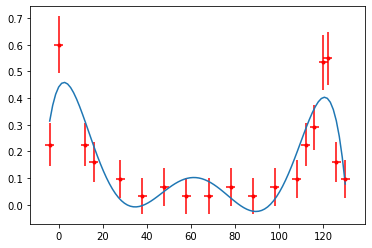

In [152]:
plt.errorbar(l, v2, xerr=sig_l, yerr=sig_v2, fmt='.', color='red')
x = np.linspace(l.min(), l.max(), 100)
plt.plot(x, fit3(x, k[0], k[1], k[2], k[3], k[4], k[5], k[6]))
#tikz.save("plot4.tex")

Максимумы

In [153]:
def extr(x):
    return -fit3(x, k[0], k[1], k[2], k[3], k[4], k[5], k[6])

In [154]:
L1 = sp.minimize(extr, 0, bounds=[(0,130)])
L2 = sp.minimize(extr, 110, bounds=[(0,130)])
print_err(L1['x'][0], 0.1 * L1['x'][0])
print_err(L2['x'][0], 0.1 * L2['x'][0])

2.53 \pm 0.25
120.62 \pm 12.06


Задержка

In [155]:
def eq(x):
    return fit3(x, k[0], k[1], k[2], k[3], k[4], k[5], k[6]) - fit3(L1['x'][0], k[0], k[1], k[2], k[3], k[4], k[5], k[6]) / 2

In [156]:
l12 = sp.fsolve(eq, 10)
print_err(l12[0], 0.1 * l12[0])

15.6 \pm 1.6
